**EDA** and preprocessing

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer

Importing the raw datasets

In [ ]:
cols_to_keep = ['Country Name', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

#education attainment
lower_secondary_og = pd.read_csv('data/attain_lower_secondary.csv', skiprows=3, header=1, usecols=cols_to_keep)
upper_secondary_og = pd.read_csv('data/attain_upper_secondary.csv', skiprows=2, header=1, usecols=cols_to_keep)
bachelors_og = pd.read_csv('data/attain_bachelors.csv', skiprows=3, header=1, usecols=cols_to_keep)
masters_og = pd.read_csv('data/attain_masters.csv', skiprows=3, header=1, usecols=cols_to_keep)
doctoral_og = pd.read_csv('data/attain_doctoral.csv', skiprows=3, header=1, usecols=cols_to_keep)

#Country Data GDP
gdp_millions_og = pd.read_csv('data/country_gdp_millions.csv', skiprows=3, header=1, usecols=cols_to_keep)
#expenditure_total_og = pd.read_csv('data/expenditure_total_gdp.csv', skiprows=3, header=1, usecols=cols_to_keep)

Restructuring the dataset to the required format


In [ ]:
#restructure the data to match the required format.

lower_secondary = lower_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="LowerSecondaryAttainment")
upper_secondary = upper_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="UpperSecondaryAttainment")
bachelors = bachelors_og.melt(id_vars=['Country Name'], var_name="Year", value_name="BachelorsAttainment")
masters = masters_og.melt(id_vars=['Country Name'], var_name="Year", value_name="MastersAttainment")
doctoral = doctoral_og.melt(id_vars=['Country Name'], var_name="Year", value_name="DoctoralAttainment")

#expenditure_total = expenditure_total_og.melt(id_vars=['Country Name'], var_name="Year", value_name="%_expenditure_gdp")
gdp_millions = gdp_millions_og.melt(id_vars=['Country Name'], var_name="Year", value_name="GDP")

In [ ]:
lower_secondary.head()

,Country Name,Year,LowerSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
upper_secondary.head()

,Country Name,Year,UpperSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
bachelors.head()

,Country Name,Year,BachelorsAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
masters.head()

,Country Name,Year,MastersAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
doctoral.head()

,Country Name,Year,DoctoralAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [ ]:
#GDP in millions of USD
gdp_millions.head()

,Country Name,Year,GDP
0,Aruba,2001,1.920112e+09
1,Africa Eastern and Southern,2001,2.414727e+11
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,1.418625e+11
4,Angola,2001,8.936064e+09


**Merging data into one DataFrame based on Country and year.**

In [ ]:
df= lower_secondary.merge(upper_secondary, on=['Country Name', 'Year'], how='inner')
df = df.merge(bachelors, on= ['Country Name', 'Year'], how='inner')
df = df.merge(masters, on= ['Country Name', 'Year'], how='inner')
df = df.merge(doctoral, on= ['Country Name', 'Year'], how='inner')
df= df.merge(gdp_millions, on= ['Country Name', 'Year'], how='inner')

In [ ]:
#getting a look at the data for better understanding
df.sort_values(by='DoctoralAttainment', ascending=False).head(10)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
3495,Switzerland,2014,97.020653,84.643852,35.605011,18.198759,2.97441,7.343966e+11
4559,Switzerland,2018,97.085258,85.681770,NaN,19.968210,2.93416,7.358892e+11
4027,Switzerland,2016,96.890182,84.536911,NaN,18.941710,2.90631,6.956007e+11
3761,Switzerland,2015,97.093933,85.190010,36.949291,19.010530,2.90017,7.021496e+11
4478,Slovenia,2017,97.772781,82.560631,20.681210,15.322310,2.75572,4.846659e+10
3998,United Arab Emirates,2016,70.710388,53.070511,31.690479,15.693130,2.53629,3.570451e+11
4212,Slovenia,2016,97.620468,81.868843,19.643311,14.654430,2.30224,4.473633e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.050380,2.03265,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.614010,1.85372,1.874508e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.765360,1.76948,1.752716e+13


**Finding out the statistics for the data at hand.**


In [ ]:
df.describe()

,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
count,859.000000,892.000000,395.000000,313.000000,266.000000,4.815000e+03
mean,67.347947,54.028222,16.953988,6.017786,0.549386,2.021519e+12
std,24.973076,24.312810,9.409896,5.871226,0.553637,7.300274e+12
min,2.036170,0.495100,0.000000,0.000000,0.000000,1.319654e+07
25%,49.352505,33.742116,9.868765,1.406010,0.165848,6.030060e+09
50%,69.974228,56.564384,16.016060,2.944240,0.426045,3.847452e+10
75%,90.304523,75.622433,23.706759,10.866280,0.754873,4.425368e+11
max,100.000000,97.399788,59.260880,28.150810,2.974410,8.760777e+13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   object 
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   GDP                       4815 non-null   float64
dtypes: float64(6), object(2)
memory usage: 355.4+ KB


In [ ]:
#changing the data type of the Year column form object to Integer
df['Year'] = df['Year'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   int64  
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   GDP                       4815 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 355.4+ KB


Further EDA as some of the GDP data is not required and needs to be removed from the data frame

In [ ]:
df.sort_values(by='GDP', ascending=False).head(20)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
5047,World,2019,NaN,NaN,NaN,NaN,NaN,8.760777e+13
4781,World,2018,NaN,NaN,NaN,NaN,NaN,8.634351e+13
4515,World,2017,NaN,NaN,NaN,NaN,NaN,8.132672e+13
3717,World,2014,NaN,NaN,NaN,NaN,NaN,7.946886e+13
3451,World,2013,NaN,NaN,NaN,NaN,NaN,7.733191e+13
4249,World,2016,NaN,NaN,NaN,NaN,NaN,7.641725e+13
3983,World,2015,NaN,NaN,NaN,NaN,NaN,7.523360e+13
3185,World,2012,NaN,NaN,NaN,NaN,NaN,7.517281e+13
2919,World,2011,NaN,NaN,NaN,NaN,NaN,7.347986e+13
2653,World,2010,NaN,NaN,NaN,NaN,NaN,6.616266e+13


In [ ]:
df.columns

Index(['Country Name', 'Year', 'LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment', 'GDP'],
      dtype='object')

We use a nullity matrix to understand how our dataset looks and how many values are missing.

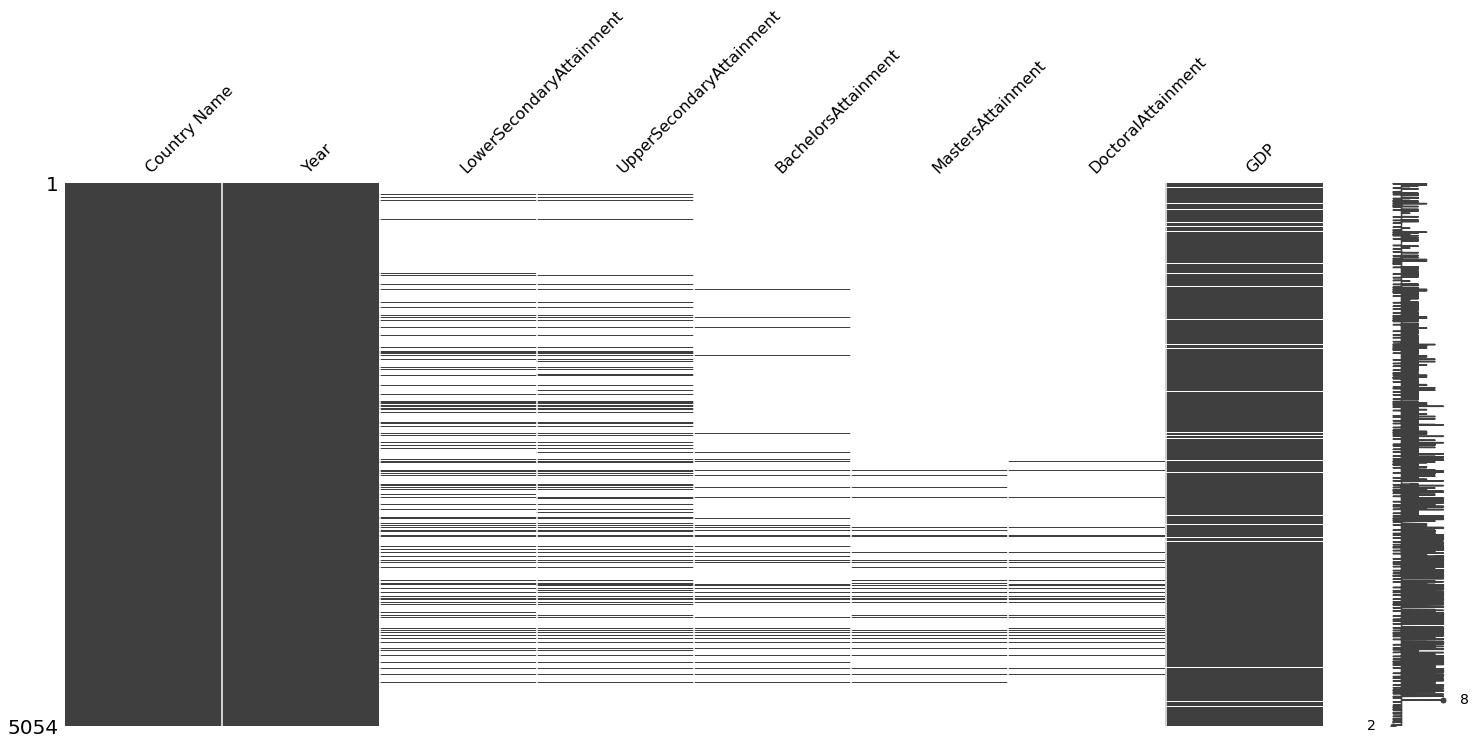

In [ ]:
msno.matrix(df)

###**Perfom listwise deletion for all rows**
#### If all the columns in the subset have null values in them, they are dropped.

In [ ]:
#All the rows with null values for the Education attainment features are removed
df1 = df.dropna(axis=0, how='all', subset=['LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment'])

df1.sort_values(by="GDP", ascending=False).head(25)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.61401,1.85372,1.874508e+13
3975,United States,2015,95.334969,88.411972,32.500759,11.99485,1.70131,1.823830e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.76536,1.76948,1.752716e+13
3443,United States,2013,95.204529,88.150307,31.660660,11.56644,1.67716,1.678485e+13
3177,United States,2012,94.984489,87.679100,NaN,NaN,NaN,1.619701e+13
2911,United States,2011,94.902733,87.590889,NaN,NaN,NaN,1.554258e+13
2645,United States,2010,94.769501,87.149406,NaN,NaN,NaN,1.499205e+13
2113,United States,2008,94.485550,86.614128,NaN,NaN,NaN,1.471284e+13
2379,United States,2009,94.535217,86.709084,NaN,NaN,NaN,1.444893e+13


In [ ]:
df1.shape

(933, 8)

In [ ]:
df1[df1['Country Name']=="Canada"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
35,Canada,2001,NaN,67.745132,NaN,NaN,NaN,7.389818e+11
1365,Canada,2006,NaN,79.403389,NaN,NaN,NaN,1.319265e+12
2695,Canada,2011,NaN,82.748993,NaN,NaN,NaN,1.793327e+12
4025,Canada,2016,NaN,84.469193,25.75444,7.09874,0.9462,1.527995e+12


###Further we perform a brief null value analysis on various columns <br>
 > Percentage of null values in the `DoctoralAttainment` column

In [ ]:
df1[df1['DoctoralAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['DoctoralAttainment'].isnull()].shape[0]*100/df1.shape[0]

71.48981779206859

> Percentage of null values in the `MastersAttainment` column

In [ ]:

df1[df1['MastersAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['MastersAttainment'].isnull()].shape[0]*100/df1.shape[0]

66.45230439442658

> Percentage of null values in the `BachelorsAttainment` column

In [ ]:

df1[df1['BachelorsAttainment'].isnull()].shape
#% of  rows containing null values
df1[df1['BachelorsAttainment'].isnull()].shape[0]*100/df1.shape[0]

57.663451232583064

> Percentage of null values in the `UpperSecondaryAttainment` column

In [ ]:

df1[df1['UpperSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['UpperSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

4.394426580921758

> Percentage of null values in the `LowerSecondaryAttainment` column

In [ ]:

df1[df1['LowerSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['LowerSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

7.931404072883173

> Counting the number of countries in the dataFrame. We can see that the total number of countries is `160`

In [ ]:
print(df1['Country Name'].nunique())
np.sort(df1['Country Name'].unique())

160


array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'I

We can see that we have *160* countries of which we will only consider about *48* due to absense of data.

Ways considered to handle the missing values
1. Dropping the columns containing the missing values.
1. Finding data from other data sources to fill in the missing values.
2. Predict values for a few missing years for that particular country.

In [ ]:
df1[df1['Country Name']=="India"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
2769,India,2011,37.56583,26.88855,9.13629,NaN,NaN,1.823050e+12


In [ ]:
df1[df1['Country Name']=="Pakistan"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
1248,Pakistan,2005,21.421249,6.758670,3.91674,NaN,NaN,1.200553e+11
1514,Pakistan,2006,32.457909,23.346050,6.29512,NaN,NaN,1.372641e+11
2046,Pakistan,2008,31.218460,22.583241,5.97695,NaN,NaN,1.700778e+11
2312,Pakistan,2009,32.203251,23.299620,6.67146,NaN,NaN,1.681528e+11
2578,Pakistan,2010,33.385101,23.878719,6.97446,NaN,NaN,1.771656e+11
2844,Pakistan,2011,33.247822,24.154091,7.36819,NaN,NaN,2.135874e+11
3110,Pakistan,2012,34.975361,25.649509,NaN,1.63380,0.46233,2.243836e+11
3376,Pakistan,2013,35.427330,26.070610,NaN,1.73293,0.49014,2.312186e+11
3642,Pakistan,2014,37.331280,27.717890,NaN,1.88082,0.51610,2.443609e+11
4174,Pakistan,2016,37.237751,27.610020,NaN,1.73439,0.50120,2.786546e+11


In [ ]:
df1[df1['Country Name']=="Albania"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3.922099e+09
1867,Albania,2008,81.733788,39.889111,NaN,NaN,NaN,1.288135e+10
2665,Albania,2011,85.226219,43.490341,1.45834,NaN,NaN,1.289077e+10
2931,Albania,2012,87.214897,45.279148,12.89966,12.33073,0.08962,1.231983e+10


### Grouping by countries and checking for the non-null values in each row.

In [ ]:

count_table = df1.groupby(by="Country Name", axis=0).count()
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Algeria,2,2,2,0,0,0,2
Andorra,7,7,3,0,3,0,7
Angola,1,1,1,1,0,0,1
Argentina,13,13,2,0,0,0,13
...,...,...,...,...,...,...,...
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5
Vietnam,1,1,1,0,0,0,1


###Filtering out countries with less than 4 years of Data

In [ ]:

logic = count_table['Year'] >= 4
count_table = count_table[logic]
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Andorra,7,7,3,0,3,0,7
Argentina,13,13,2,0,0,0,13
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5


In [ ]:
# List of countries to be considered.
countries = list(count_table.index)
print(countries)

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia

### Create a new DataFrame with only the countries to be included.

In [ ]:
df_new = df1[df1['Country Name'].isin(countries)]
df_new

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3.922099e+09
9,Argentina,2001,45.891689,34.293350,NaN,NaN,NaN,2.686968e+11
10,Armenia,2001,91.079193,81.583076,20.356550,NaN,NaN,2.118468e+09
20,Bangladesh,2001,26.714729,17.128429,NaN,NaN,NaN,5.399129e+10
21,Bulgaria,2001,87.861794,59.462120,18.045570,NaN,NaN,1.418350e+10
...,...,...,...,...,...,...,...,...
4755,Thailand,2018,46.237068,33.305931,14.939000,2.05563,0.10102,5.066111e+11
4772,Uruguay,2018,56.832142,30.441191,11.473180,2.08136,NaN,6.451504e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,2.061186e+13
4774,Uzbekistan,2018,99.904869,96.149246,16.303419,NaN,NaN,5.039261e+10


In [ ]:
logic = count_table['DoctoralAttainment'] >= 4
count_table_doctoral = count_table[logic]
count_table_doctoral.head(10)

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Cyprus,14,14,14,5,4,5,14
Czech Republic,12,12,12,4,4,4,12
Denmark,13,9,13,4,4,4,13
Finland,13,0,13,5,5,5,13


We now consider a list of countries containing more than 4 years of data in the Doctoral Attainment column to perform the linear regression.

In [ ]:
# list of countries with more than 4 years of data in Doctoral Attainment for Linear Regression.
countries_doctoral_lr = list(count_table_doctoral.index)
print(countries_doctoral_lr)
print(len(countries_doctoral_lr))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Iran, Islamic Rep.', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'West Bank and Gaza']
33


In [ ]:
logic = count_table['MastersAttainment'] >= 4
count_table_masters = count_table[logic]
count_table_masters.head(10)

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Chile,8,8,8,4,4,0,8
Colombia,14,14,14,11,11,0,14
Costa Rica,10,10,10,4,4,1,10
Cyprus,14,14,14,5,4,5,14


Finding out the countries with workable amount of data and listing out the countries to keep:

In [ ]:
# List of countries to keep.
# list of countries with more than 4 years of data in Masters' Attainment for Linear Regression.
countries_masters = list(count_table_masters.index)
print(countries_masters)
print(len(countries_masters))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'Uruguay', 'West Bank and Gaza']
40


In [ ]:
logic = count_table['BachelorsAttainment'] >= 4
count_table_bachelors = count_table[logic]
count_table_bachelors.head(10)

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Azerbaijan,11,11,11,7,0,3,11
Bahrain,5,5,5,4,4,4,5
Bangladesh,10,10,10,9,9,9,10
Belgium,11,11,11,5,5,5,11
Bosnia and Herzegovina,6,4,6,4,3,3,6
Bulgaria,13,13,13,13,0,0,13


In [ ]:
# list of countries with more than 4 years of data in Bachelors' Attainment
countries_bachelors = list(count_table_bachelors.index)
print(countries_bachelors)
print(len(countries_bachelors))

['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Honduras', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Qatar', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'United States', 'Uruguay', 'Uzbekistan', 'West Bank and Gaza']
46


In [ ]:
logic = count_table['UpperSecondaryAttainment'] >= 4
count_table_uppersec = count_table[logic]
count_table_uppersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15
Austria,12,1,12,4,4,4,12
Azerbaijan,11,11,11,7,0,3,11
...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13
Uzbekistan,5,5,5,5,0,0,5
"Venezuela, RB",7,7,6,3,2,0,5


In [ ]:
# list of countries with more than 4 years of data in Upper Secondary Attainment for Linear Regression.
countries_uppersec = list(count_table_uppersec.index)
print(countries_uppersec)
print(len(countries_uppersec))

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'Unit

In [ ]:
logic = count_table['LowerSecondaryAttainment'] >= 4
count_table_lowersec = count_table[logic]
count_table_lowersec.head()

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,GDP
Country Name,,,,,,,
Albania,4,4,4,2,1,1,4
Andorra,7,7,3,0,3,0,7
Argentina,13,13,2,0,0,0,13
Armenia,4,4,4,4,0,3,4
Australia,15,15,15,6,6,6,15


In [ ]:
# list of countries with more than 4 years of data in Lower Secondary Attainment
countries_lowersec = list(count_table_lowersec.index)
print(countries_lowersec)
print(len(countries_lowersec))

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'United 

We now check the missingness of values in our modified dataset using a nullity matrix.

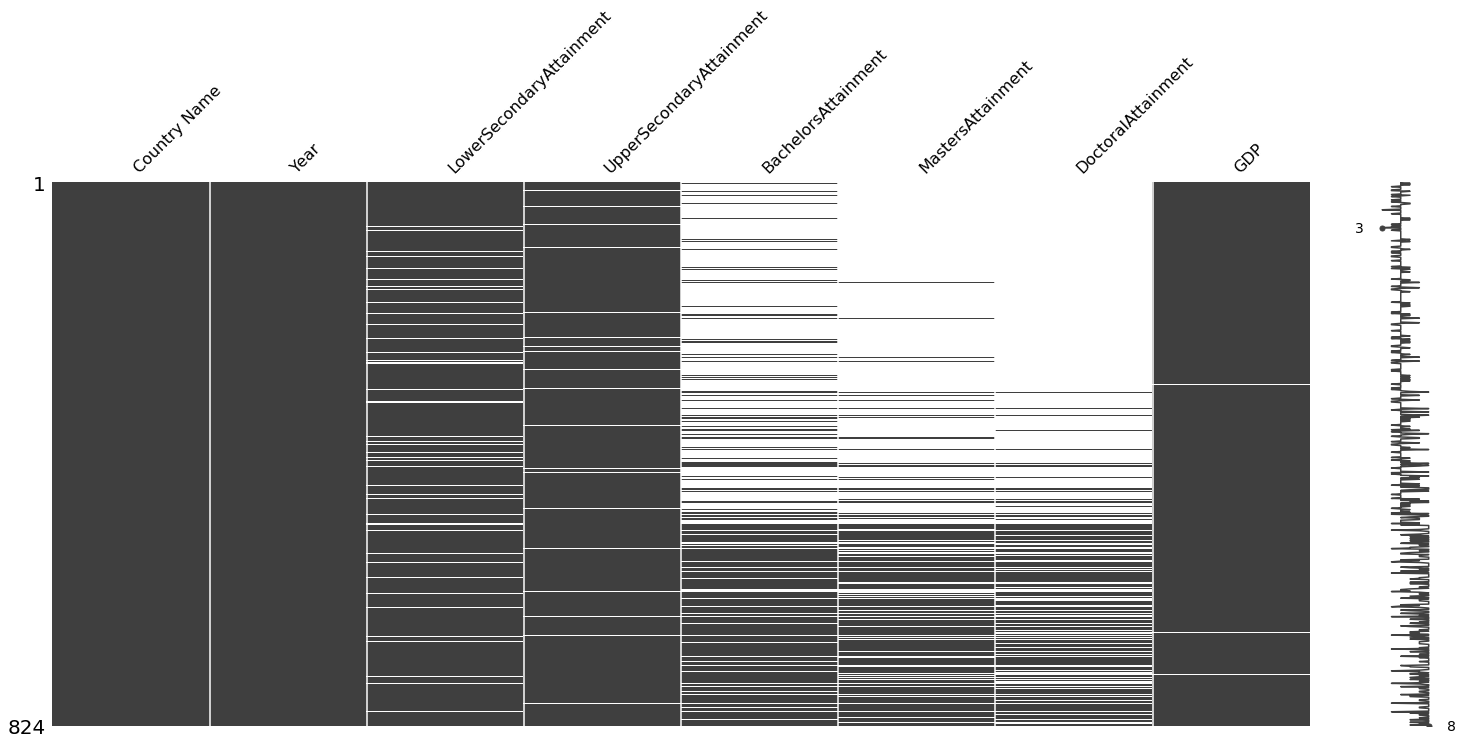

In [ ]:
msno.matrix(df_new)